# Logistic regression To predict heart disease

## Tabel of content
<ul>
    <li><a href=""></a></li>
    <li><a href=""></a></li>
    <li><a href=""></a></li>
    <li><a href=""></a></li>
    <li><a href=""></a></li>
    <li><a href=""></a></li>
    <li><a href=""></a></li>
</ul>
<a id='Introduction'></a>
## Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression


## Dataset
- <b>Sex:</b> male or female.
- <b>Age:</b> Age of the patient.
- <b>Current Smoker:</b> whether or not the patient is a current smoker.
- <b>Cigs Per Day:</b> the number of cigarettes that the person smoked on average in one day.
- <b>BP Meds:</b> whether or not the patient was on blood pressure medication.
- <b>Prevalent Stroke:</b> whether or not the patient had previously had a stroke.
- <b>Prevalent Hyp:</b> whether or not the patient was hypertensive.
- <b>Diabetes:</b> whether or not the patient had diabetes.
- <b>Tot Chol:</b> total cholesterol level.
- <b>Sys BP:</b> systolic blood pressure.
- <b>Dia BP:</b> diastolic blood pressure.
- <b>BMI:</b> Body Mass Index.
- <b>Heart Rate:</b> heart rate. 
- <b>Glucose:</b> glucose level.
- <b>TenYearCHD:</b> 10 year risk of coronary heart disease CHD.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [59]:
df = pd.read_csv("framingham.csv")

In [60]:
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4167,0,45,1.0,0,0.0,0.0,0,0,0,235.0,106.0,58.0,26.79,75.0,79.0,0
2128,0,58,1.0,1,20.0,0.0,0,0,0,225.0,146.0,77.0,24.60,96.0,53.0,0
3124,0,51,3.0,0,0.0,0.0,0,1,0,198.0,142.5,80.0,23.86,76.0,100.0,0
808,0,47,2.0,1,10.0,0.0,0,0,0,191.0,125.0,72.5,23.81,75.0,85.0,0
4061,1,44,1.0,0,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN,0


<a id='Overview'></a>
# Data Overview

In [61]:
df.shape

(4238, 16)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [63]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [76]:
df = df.astype({"cigsPerDay": int, "BPMeds": int})

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [64]:
df.drop('education', axis=1, inplace=True)

In [65]:
df.rename({"male":"Sex"}, axis=1, inplace=True)

In [66]:
df.duplicated().sum()

0

In [67]:
df.isnull().sum()

Sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [68]:
len(df)

4238

In [69]:
null_value = (100 * df.isnull().sum() / len(df))
null_value = null_value.sort_values()

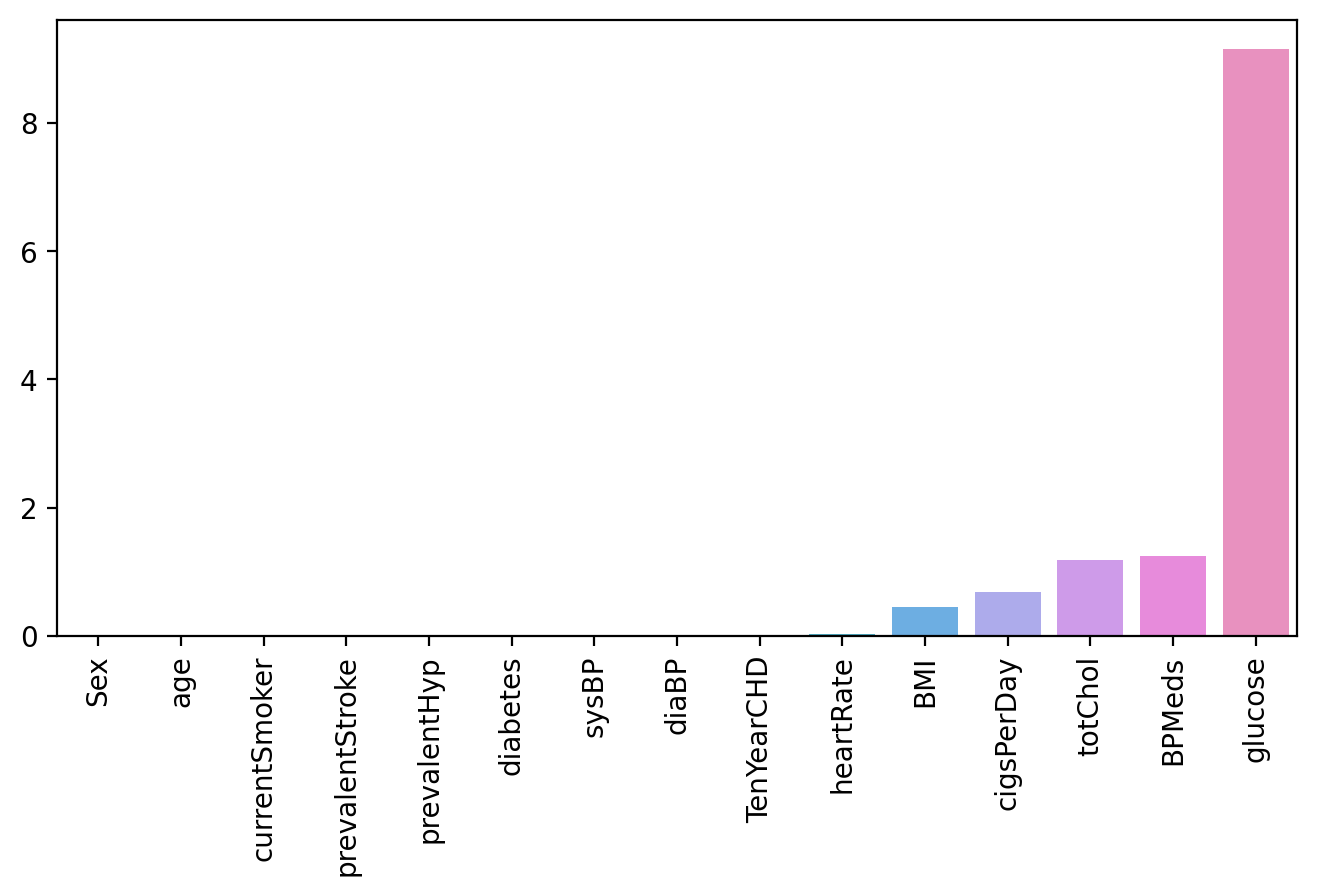

In [70]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=null_value.index, y=null_value)
plt.xticks(rotation=90);

<a id='Cleaning'></a>
# Data Cleaning

In [77]:
df[df['glucose'].isnull()].head(15)

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
42,0,52,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
54,0,39,1,20.0,0.0,0,0,0,209.0,115.0,75.0,22.54,90.0,NaN,0
70,0,63,0,0.0,0.0,0,0,0,248.0,164.5,76.0,29.35,70.0,NaN,0
111,1,51,0,0.0,0.0,0,1,0,214.0,145.0,92.5,26.09,70.0,NaN,0
114,0,41,0,0.0,0.0,0,1,0,265.0,136.0,98.0,42.15,90.0,NaN,0
131,1,43,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
154,0,38,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0


In [78]:
df['glucose'].mean()

81.96675324675324

In [80]:
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

In [82]:
df['glucose'].isnull().sum()

0

In [83]:
df[df['BPMeds'].isnull()].head(15)

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
49,1,36,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.000000,0
77,0,44,1,20.0,NaN,0,0,0,213.0,115.0,72.5,21.16,80.0,89.000000,0
193,1,45,1,40.0,NaN,0,0,0,278.0,135.0,84.0,23.79,75.0,79.000000,1
245,1,46,1,30.0,NaN,0,1,0,253.0,147.0,85.0,30.62,100.0,75.000000,0
314,0,39,0,0.0,NaN,0,0,0,242.0,113.0,85.0,25.54,85.0,104.000000,0
395,0,65,0,0.0,NaN,0,1,0,270.0,165.0,98.0,21.66,62.0,92.000000,1
421,1,44,0,0.0,NaN,0,0,1,190.0,122.0,81.0,36.12,70.0,143.000000,0
765,1,50,1,9.0,NaN,0,0,0,296.0,119.0,90.0,23.55,75.0,69.000000,1
769,0,37,0,0.0,NaN,0,0,0,145.0,105.0,73.0,23.44,58.0,80.000000,0
797,0,59,0,0.0,NaN,0,1,0,240.0,195.0,118.0,23.82,80.0,73.000000,0


In [ ]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mean())

<a id='Exploratory'></a>
# Exploratory Data Analysis (EDA)

<a id='Predictive'></a>
# Predictive Modeling

<a id='Conclusion'></a>
# Conclusion